# Main

## Import dependencies


In [1]:
#Import libraries
import numpy as np
import cv2
import sys
import os



## Pre-proccessing

In [3]:
from functions.fun_copy_images import copy_images

#Copio images from raw to preprocessed
folder_raw = "data/pilar_data/OC009_2023_08_15/raw"
folder_preprocessed = "data/pilar_data/OC009_2023_08_15/preprocessed"

copy_images(folder_raw, folder_preprocessed)

#Defino files como los nombres de todos los files dentro de folder
files = os.listdir(folder_preprocessed)
#Añado a cada file la dirección de la carpeta
files = [folder_preprocessed + '/' + file for file in files]


In [4]:
#Crop
from functions.fun_crop import crop
coordenadas = (504, 0, 1008, 504)

#Corroboro que las coordenadas correspondan a imagen cuadrada
if coordenadas[2] - coordenadas[0] != coordenadas[3] - coordenadas[1]:
    raise ValueError("Las coordenadas no corresponden a una imagen cuadrada")
    
files = crop(files, coordenadas)


In [5]:
#Scaleo a 768x768
from functions.fun_scale import scale

files = scale(files, (768, 768))


In [6]:
#Gray-scale
from functions.fun_gray_scale import gray_scale

files = gray_scale(files)


## Apply tool

In [7]:
#Copio images from preprocessed to processed
folder_processed = "data/pilar_data/OC009_2023_08_15/processed"
copy_images(folder_preprocessed, folder_processed)

files = os.listdir(folder_processed)
files = [folder_processed + '/' + file for file in files]

#Por alguna razón que desconozco, hay que volver a pasar a la escala de grises
files = gray_scale(files)


{'thickness': np.float64(233.66666666666666), 'area': np.float64(1.426746), 'vascular_index': np.float64(0.44555), 'vessel_area': np.float64(0.63569), 'raw_thickness': array([240, 267, 194])}


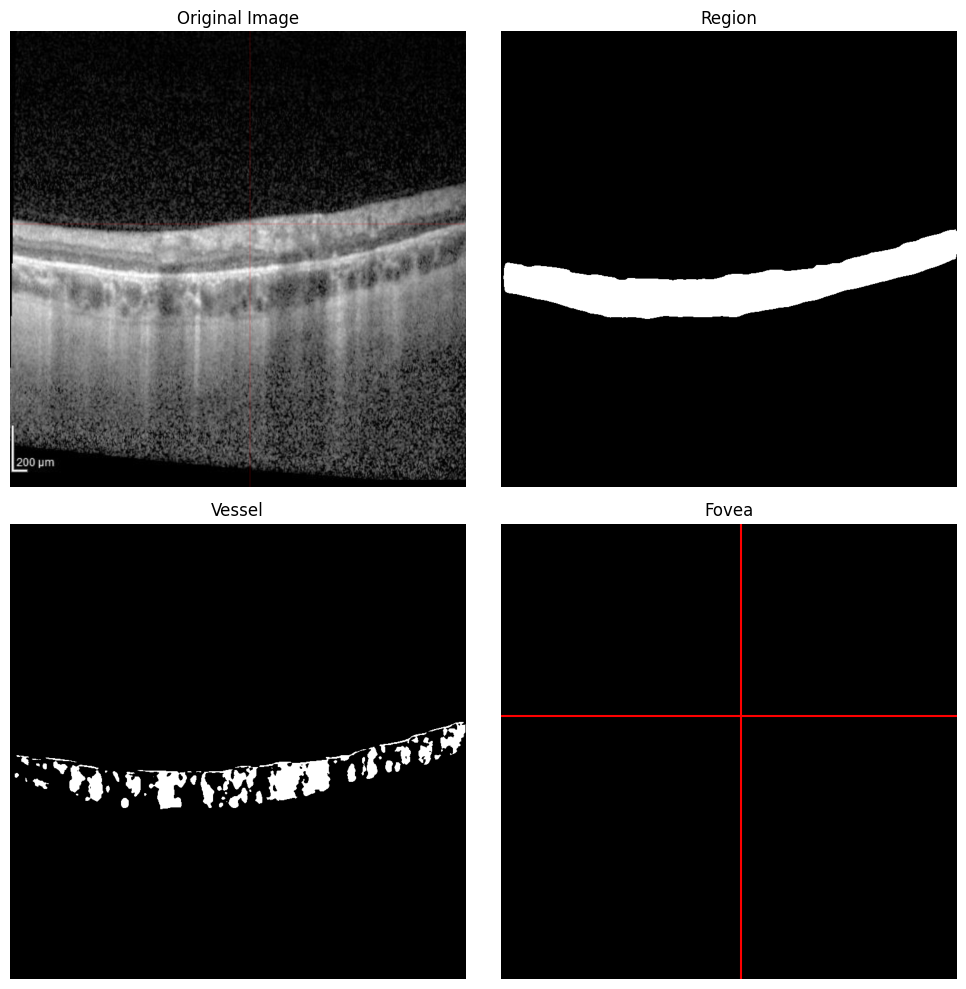

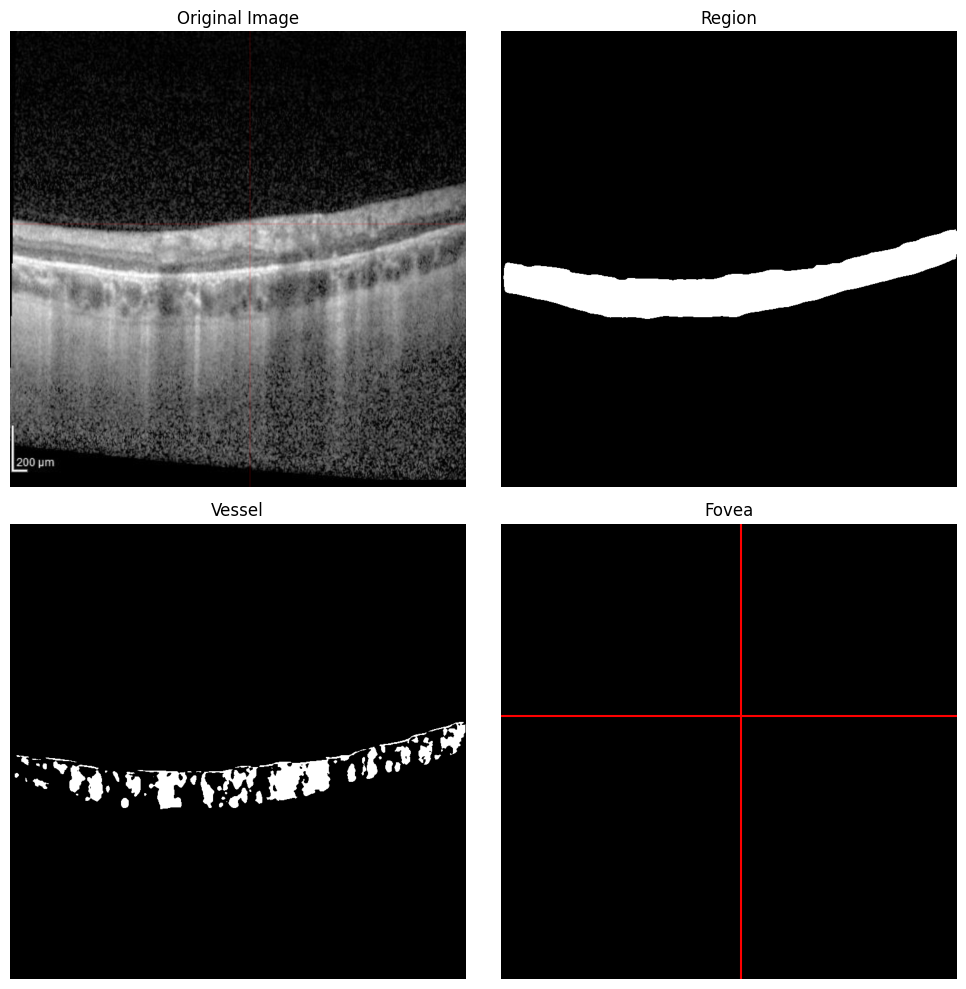

In [8]:

from choroidalyze import Choroidalyzer

# This initialises choroidalyzer. 
# It will try to automatically download the model weights from github the first time you run it. 
choroidalyzer = Choroidalyzer()



#Cargo imagen de ejemplo
file = files[0]
#Convierto imagen a blanco y negro
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
cv2.imwrite(file, img)

# basic useage: get the metrics
metrics = choroidalyzer.analyze(file) #, scale=(11.49, 3.87)
print(metrics)

# choroidalyzer also has a basic plotting function to inspect segmentation outputs
choroidalyzer.predict_and_plot(file)




